In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Forecastingfall2024/FINAL EXAM"

/content/drive/MyDrive/Forecastingfall2024/FINAL EXAM


In [3]:
ls

'Beans (dry).csv'    Combined_Production_By_Good.csv  'Oranges (big size).csv'   Tomatoes.csv
 Cassava.csv        'data (1).zip'                    'Peas (fresh).csv'
'Chili (red).csv'    FINALEXAM.ipynb                  'Potatoes (Irish).csv'
 combined_data.csv   Maize.csv                         Sorghum.csv


Task 1: Combine CSV Files into a Single DataFrame

In [4]:
import pandas as pd
import glob
import os
path = '/content/drive/MyDrive/Forecastingfall2024/FINAL EXAM'
all_files = glob.glob(path + "/*.csv")
dataframes = {}
for filename in all_files:
    file_name = os.path.basename(filename)
    df = pd.read_csv(filename)
    dataframes[file_name] = df
for file_name, df in dataframes.items():
    print(f"Data from {file_name}:")
    print(df.head())
    print("\n")


Data from Beans (dry).csv:
   adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  cm_id  \
0      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
1      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
2      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
3      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
4      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   

       cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Beans (dry)      77      RWF     15  Retail      5      KG        11   
1  Beans (dry)      77      RWF     15  Retail      5      KG        12   
2  Beans (dry)      77      RWF     15  Retail      5      KG         1   
3  Beans (dry)      77      RWF     15  Retail      5      KG         2   
4  Beans (dry)      77      RWF     15  Retail      5      KG         3   

   mp_year  mp_price mp_commoditysource  
0    

In [5]:
dataframes.keys()

dict_keys(['Beans (dry).csv', 'Cassava.csv', 'Chili (red).csv', 'Maize.csv', 'Oranges (big size).csv', 'Peas (fresh).csv', 'Potatoes (Irish).csv', 'Tomatoes.csv', 'Sorghum.csv', 'Combined_Production_By_Good.csv', 'combined_data.csv'])

In [6]:
import pandas as pd
import glob
import os

path = '/content/drive/MyDrive/Forecastingfall2024/FINAL EXAM'
all_files = glob.glob(path + "/*.csv")
dataframes = {}
for filename in all_files:
    good_name = os.path.splitext(os.path.basename(filename))[0]
    df = pd.read_csv(filename)
    df['good'] = good_name
    dataframes[good_name] = df


for good_name, df in dataframes.items():
    print(f"Data from {good_name}:")
    print(df.head())
    print("\n")


Data from Beans (dry):
   adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  cm_id  \
0      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
1      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
2      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
3      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   
4      205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo    262   

       cm_name  cur_id cur_name  pt_id pt_name  um_id um_name  mp_month  \
0  Beans (dry)      77      RWF     15  Retail      5      KG        11   
1  Beans (dry)      77      RWF     15  Retail      5      KG        12   
2  Beans (dry)      77      RWF     15  Retail      5      KG         1   
3  Beans (dry)      77      RWF     15  Retail      5      KG         2   
4  Beans (dry)      77      RWF     15  Retail      5      KG         3   

   mp_year  mp_price mp_commoditysource         goo

In [7]:
import pandas as pd
import glob
import os
path = '/content/drive/MyDrive/Forecastingfall2024/FINAL EXAM'
all_files = glob.glob(path + "/*.csv")
dataframes = {}
for filename in all_files:
    good_name = os.path.splitext(os.path.basename(filename))[0]
    df = pd.read_csv(filename)
    df.columns = df.columns.str.strip()
    print(f"Columns in {good_name}: {df.columns.tolist()}")
    if 'mp_year' in df.columns and 'mp_month' in df.columns:
        df['date'] = pd.to_datetime(df[['mp_year', 'mp_month']].astype(str).agg('-'.join, axis=1) + '-01', errors='coerce')
    else:
        print(f"Warning: 'mp_year' or 'mp_month' not found in {good_name}")
    df['good'] = good_name
    dataframes[good_name] = df
for good_name, df in dataframes.items():
    print(f"Data from {good_name}:")
    print("\n")


Columns in Beans (dry): ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']
Columns in Cassava: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']
Columns in Chili (red): ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']
Columns in Maize: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']
Columns in Oranges (big size): ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_n

<ipython-input-7-4d6c7916b59f>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df[['mp_year', 'mp_month']].astype(str).agg('-'.join, axis=1) + '-01', errors='coerce')


In [8]:
dataframes

{'Beans (dry)':       adm0_id adm0_name  adm1_id             adm1_name  mkt_id mkt_name  \
 0         205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
 1         205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
 2         205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
 3         205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
 4         205    Rwanda    21973  $West/Iburengerazuba    1045  Birambo   
 ...       ...       ...      ...                   ...     ...      ...   
 4352      205    Rwanda    21971   $North/Amajyaruguru    1562   Rusine   
 4353      205    Rwanda    21971   $North/Amajyaruguru    1562   Rusine   
 4354      205    Rwanda    21971   $North/Amajyaruguru    1562   Rusine   
 4355      205    Rwanda    21971   $North/Amajyaruguru    1562   Rusine   
 4356      205    Rwanda    21971   $North/Amajyaruguru    1562   Rusine   
 
       cm_id      cm_name  cur_id cur_name  pt_id pt_name  um_id um_nam

In [9]:
unwanted_keys = ['Combined_Production_By_Good', 'combined_data']
for key in unwanted_keys:
    dataframes.pop(key, None)
print(dataframes.keys())

dict_keys(['Beans (dry)', 'Cassava', 'Chili (red)', 'Maize', 'Oranges (big size)', 'Peas (fresh)', 'Potatoes (Irish)', 'Tomatoes', 'Sorghum'])


In [10]:
dataframes['Beans (dry)']

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,date,good
0,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,11,2010,325.0000,MINAGRI,2010-11-01,Beans (dry)
1,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,12,2010,310.3333,MINAGRI,2010-12-01,Beans (dry)
2,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,1,2011,283.0000,MINAGRI,2011-01-01,Beans (dry)
3,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,2,2011,275.0000,MINAGRI,2011-02-01,Beans (dry)
4,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,3,2011,285.6000,MINAGRI,2011-03-01,Beans (dry)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,205,Rwanda,21971,$North/Amajyaruguru,1562,Rusine,262,Beans (dry),77,RWF,15,Retail,5,KG,8,2015,377.4000,MINAGRI,2015-08-01,Beans (dry)
4353,205,Rwanda,21971,$North/Amajyaruguru,1562,Rusine,262,Beans (dry),77,RWF,15,Retail,5,KG,9,2015,388.0000,MINAGRI,2015-09-01,Beans (dry)
4354,205,Rwanda,21971,$North/Amajyaruguru,1562,Rusine,262,Beans (dry),77,RWF,15,Retail,5,KG,10,2015,408.0000,MINAGRI,2015-10-01,Beans (dry)
4355,205,Rwanda,21971,$North/Amajyaruguru,1562,Rusine,262,Beans (dry),77,RWF,15,Retail,5,KG,11,2015,458.2000,MINAGRI,2015-11-01,Beans (dry)


In [11]:
combined_data = pd.concat(dataframes.values(), axis=0, ignore_index=True)
combined_data.shape

(27387, 20)

In [12]:
combined_data.set_index('date', inplace=True)
combined_data.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,good
date,,,,,,,,,,,,,,,,,,,
2010-11-01,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,11,2010,325.0000,MINAGRI,Beans (dry)
2010-12-01,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,12,2010,310.3333,MINAGRI,Beans (dry)
2011-01-01,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,1,2011,283.0000,MINAGRI,Beans (dry)
2011-02-01,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,2,2011,275.0000,MINAGRI,Beans (dry)
2011-03-01,205,Rwanda,21973,$West/Iburengerazuba,1045,Birambo,262,Beans (dry),77,RWF,15,Retail,5,KG,3,2011,285.6000,MINAGRI,Beans (dry)


In [13]:
combined_data.shape

(27387, 19)

In [14]:
pivoted_data = combined_data.pivot_table(
    index='date',
    columns='good',
    values='mp_price',
    aggfunc='mean'
)
pivoted_data.columns.name = None
print(pivoted_data.info())
print(pivoted_data.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2008-01-01 to 2015-12-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Beans (dry)         96 non-null     float64
 1   Cassava             96 non-null     float64
 2   Chili (red)         38 non-null     float64
 3   Maize               96 non-null     float64
 4   Oranges (big size)  38 non-null     float64
 5   Peas (fresh)        60 non-null     float64
 6   Potatoes (Irish)    96 non-null     float64
 7   Sorghum             96 non-null     float64
 8   Tomatoes            38 non-null     float64
dtypes: float64(9)
memory usage: 7.5 KB
None
            Beans (dry)     Cassava  Chili (red)       Maize  \
date                                                           
2008-01-01   272.348485  138.194444          NaN  176.174242   
2008-02-01   257.045455  139.600000          NaN  157.460938   
2008-03-01   272.500000  147.916667   

In [15]:
pivoted_data.shape

(96, 9)

In [16]:
all_dates = sorted(pivoted_data.index.unique())
pivoted_data = pivoted_data.reindex(all_dates)
print(pivoted_data.info())
print(pivoted_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2008-01-01 to 2015-12-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Beans (dry)         96 non-null     float64
 1   Cassava             96 non-null     float64
 2   Chili (red)         38 non-null     float64
 3   Maize               96 non-null     float64
 4   Oranges (big size)  38 non-null     float64
 5   Peas (fresh)        60 non-null     float64
 6   Potatoes (Irish)    96 non-null     float64
 7   Sorghum             96 non-null     float64
 8   Tomatoes            38 non-null     float64
dtypes: float64(9)
memory usage: 7.5 KB
None
            Beans (dry)     Cassava  Chili (red)       Maize  \
date                                                           
2008-01-01   272.348485  138.194444          NaN  176.174242   
2008-02-01   257.045455  139.600000          NaN  157.460938   
2008-03-01   272.500000  147.916667   

In [17]:
full_date_range = pd.date_range(start=combined_data.index.min(), end=combined_data.index.max(), freq='D')
aligned_data = pivoted_data
aligned_data.index.name = 'date'
print(aligned_data.info())
print(aligned_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2008-01-01 to 2015-12-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Beans (dry)         96 non-null     float64
 1   Cassava             96 non-null     float64
 2   Chili (red)         38 non-null     float64
 3   Maize               96 non-null     float64
 4   Oranges (big size)  38 non-null     float64
 5   Peas (fresh)        60 non-null     float64
 6   Potatoes (Irish)    96 non-null     float64
 7   Sorghum             96 non-null     float64
 8   Tomatoes            38 non-null     float64
dtypes: float64(9)
memory usage: 7.5 KB
None
            Beans (dry)     Cassava  Chili (red)       Maize  \
date                                                           
2008-01-01   272.348485  138.194444          NaN  176.174242   
2008-02-01   257.045455  139.600000          NaN  157.460938   
2008-03-01   272.500000  147.916667   

Task 2: Explore the Consolidated Data

Objective: Analyze the structure, quality, and patterns of the consolidated
DataFrame created in Task 1

In [18]:
aligned_data.shape

(96, 9)

In [19]:
print(aligned_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2008-01-01 to 2015-12-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Beans (dry)         96 non-null     float64
 1   Cassava             96 non-null     float64
 2   Chili (red)         38 non-null     float64
 3   Maize               96 non-null     float64
 4   Oranges (big size)  38 non-null     float64
 5   Peas (fresh)        60 non-null     float64
 6   Potatoes (Irish)    96 non-null     float64
 7   Sorghum             96 non-null     float64
 8   Tomatoes            38 non-null     float64
dtypes: float64(9)
memory usage: 7.5 KB
None


In [20]:
date_range = pd.date_range(start=aligned_data.index.min(), end=aligned_data.index.max(), freq='MS')
missing_dates = date_range.difference(aligned_data.index)
if missing_dates.empty:
    print("The date range of the index is continuous.")
else:
    print("The date range of the index is NOT continuous.")
    print("Missing dates:")
    print(missing_dates)

print("\nDate Range Analysis:")
print(f"Start Date: {aligned_data.index.min()}")
print(f"End Date: {aligned_data.index.max()}")
print(f"Number of data points: {len(aligned_data)}")

duplicated_dates = aligned_data.index.duplicated(keep=False)
if duplicated_dates.any():
    print("\nWarning: Duplicated dates found:")
aligned_data[duplicated_dates]


The date range of the index is continuous.

Date Range Analysis:
Start Date: 2008-01-01 00:00:00
End Date: 2015-12-01 00:00:00
Number of data points: 96


,Beans (dry),Cassava,Chili (red),Maize,Oranges (big size),Peas (fresh),Potatoes (Irish),Sorghum,Tomatoes
date,,,,,,,,,


In [21]:
missing_values = aligned_data.isnull().sum()

print("Missing values for each good:")
missing_values

Missing values for each good:


,0
Beans (dry),0
Cassava,0
Chili (red),58
Maize,0
Oranges (big size),58
Peas (fresh),36
Potatoes (Irish),0
Sorghum,0
Tomatoes,58


In [22]:
missing_percentage = (aligned_data.isnull().sum() / len(aligned_data)) * 100
print("\nPercentage of missing values per column:")
missing_percentage


Percentage of missing values per column:


,0
Beans (dry),0.000000
Cassava,0.000000
Chili (red),60.416667
Maize,0.000000
Oranges (big size),60.416667
Peas (fresh),37.500000
Potatoes (Irish),0.000000
Sorghum,0.000000
Tomatoes,60.416667


In [23]:
summary_stats = aligned_data.describe()
summary_stats.loc['median'] = aligned_data.median()
summary_stats = summary_stats.loc[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]
print("\nSummary Statistics for each good:")
summary_stats


Summary Statistics for each good:


,Beans (dry),Cassava,Chili (red),Maize,Oranges (big size),Peas (fresh),Potatoes (Irish),Sorghum,Tomatoes
count,96.000000,96.000000,38.000000,96.000000,38.000000,60.000000,96.000000,96.000000,38.000000
mean,334.083819,195.969790,1129.368683,227.949904,583.524695,922.292466,156.671755,275.130178,376.446175
median,327.908199,204.739094,1056.904008,225.736949,582.115439,875.390358,150.377180,258.348848,374.262788
std,64.789260,35.205063,306.620568,41.577013,77.458279,228.328475,35.260186,61.370135,56.819252
min,219.697584,130.102775,655.904309,145.820312,412.980904,553.885886,97.000000,164.921875,273.199820
25%,283.551136,167.605392,921.579328,201.777282,527.109577,734.679617,130.808064,228.739353,334.180228
50%,327.908199,204.739094,1056.904008,225.736949,582.115439,875.390358,150.377180,258.348848,374.262788
75%,380.569222,226.194643,1260.922756,256.372667,644.573860,1043.666008,183.347528,332.083987,411.263391
max,530.042987,260.887844,1952.848602,335.986608,726.086930,1499.938600,245.468424,388.809678,469.490286


In [24]:
import matplotlib.pyplot as plt

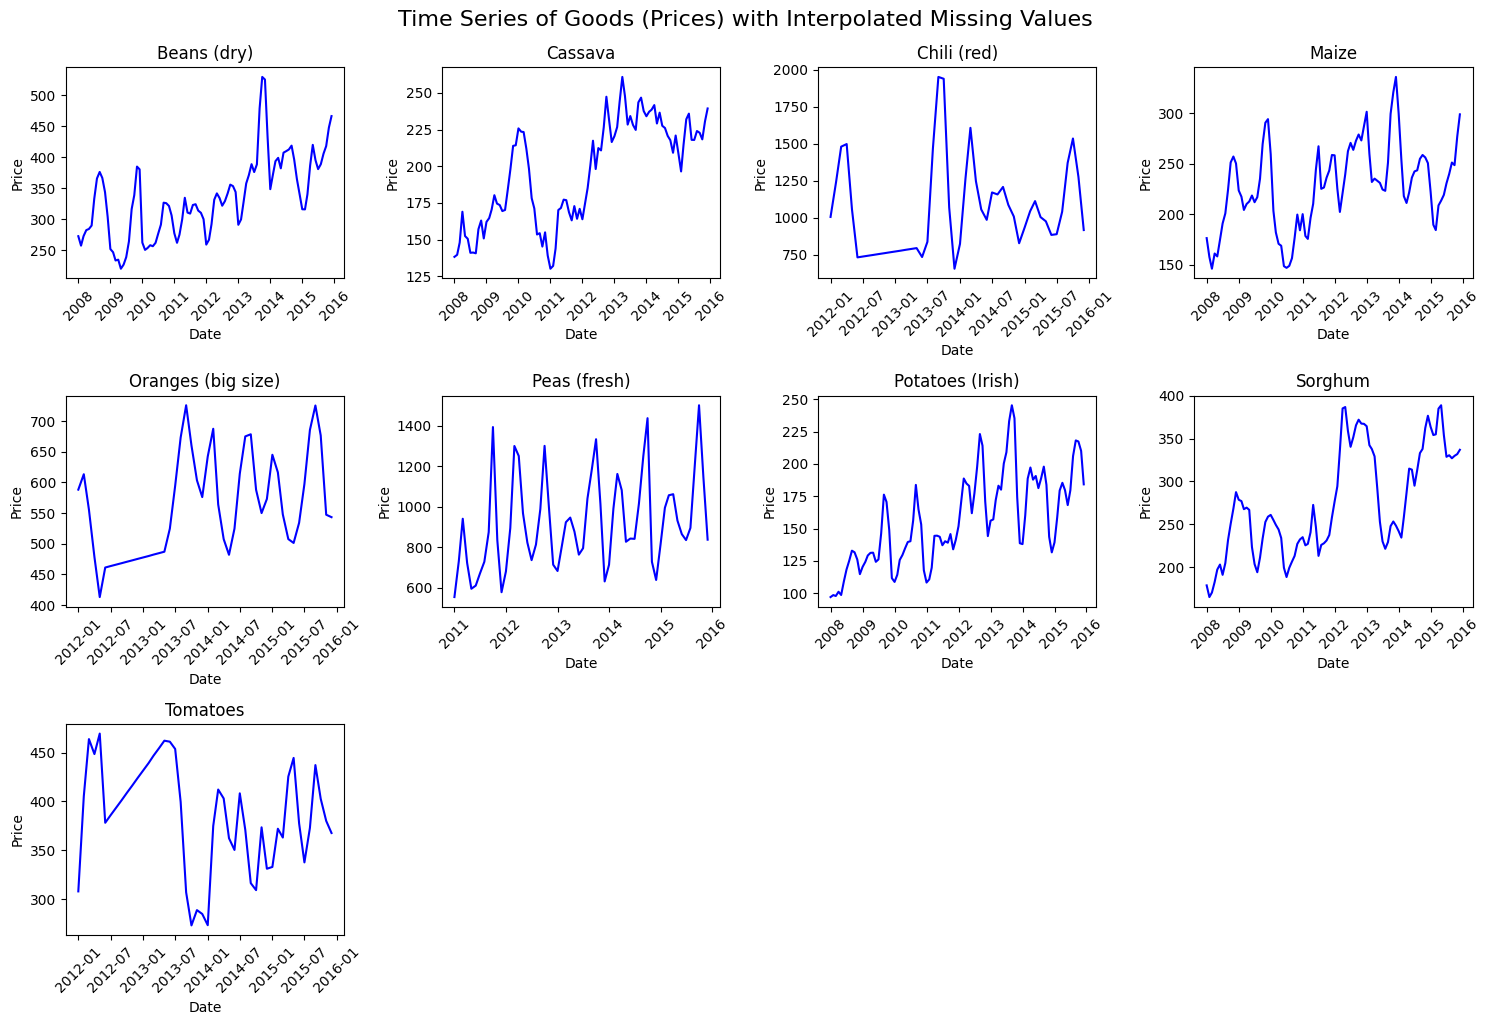

In [25]:
aligned_data_filled = aligned_data.interpolate(method='linear')
plt.figure(figsize=(15, 10))
for i, column in enumerate(aligned_data.columns, start=1):
    plt.subplot(3, 4, i)
    plt.plot(aligned_data_filled.index, aligned_data_filled[column], label=column, color='blue')
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Time Series of Goods (Prices) with Interpolated Missing Values', fontsize=16, y=1.02)
plt.show()


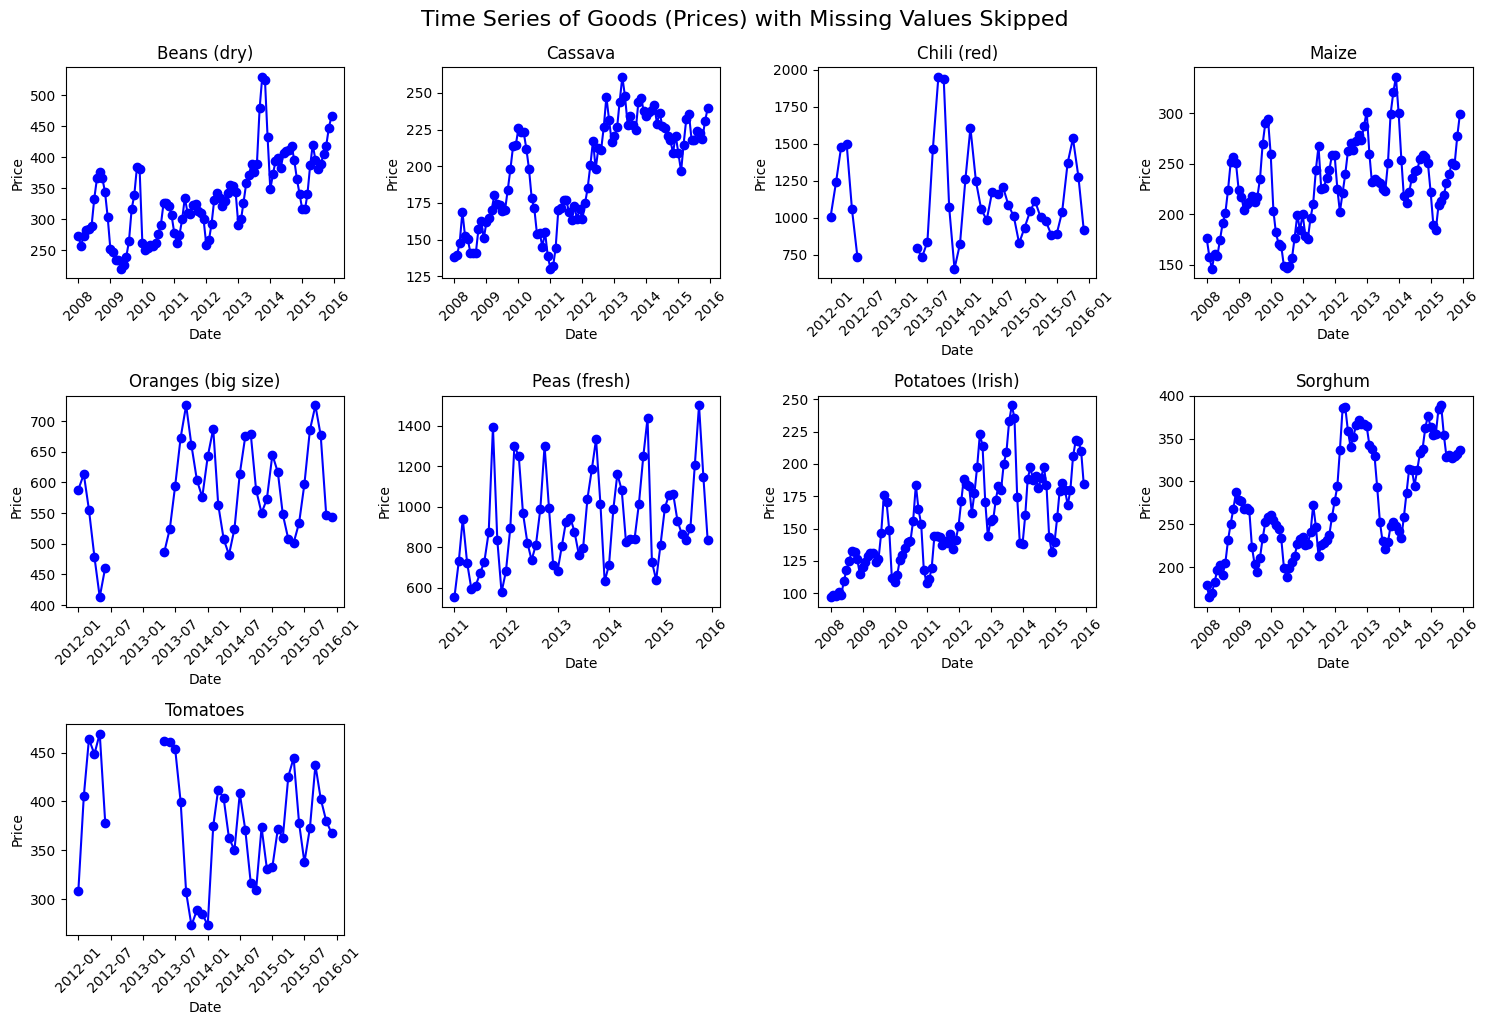

In [26]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(aligned_data.columns, start=1):
    plt.subplot(3, 4, i)
    plt.plot(aligned_data.index, aligned_data[column], label=column, color='blue', linestyle='-', marker='o')
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Time Series of Goods (Prices) with Missing Values Skipped', fontsize=16, y=1.02)
plt.show()


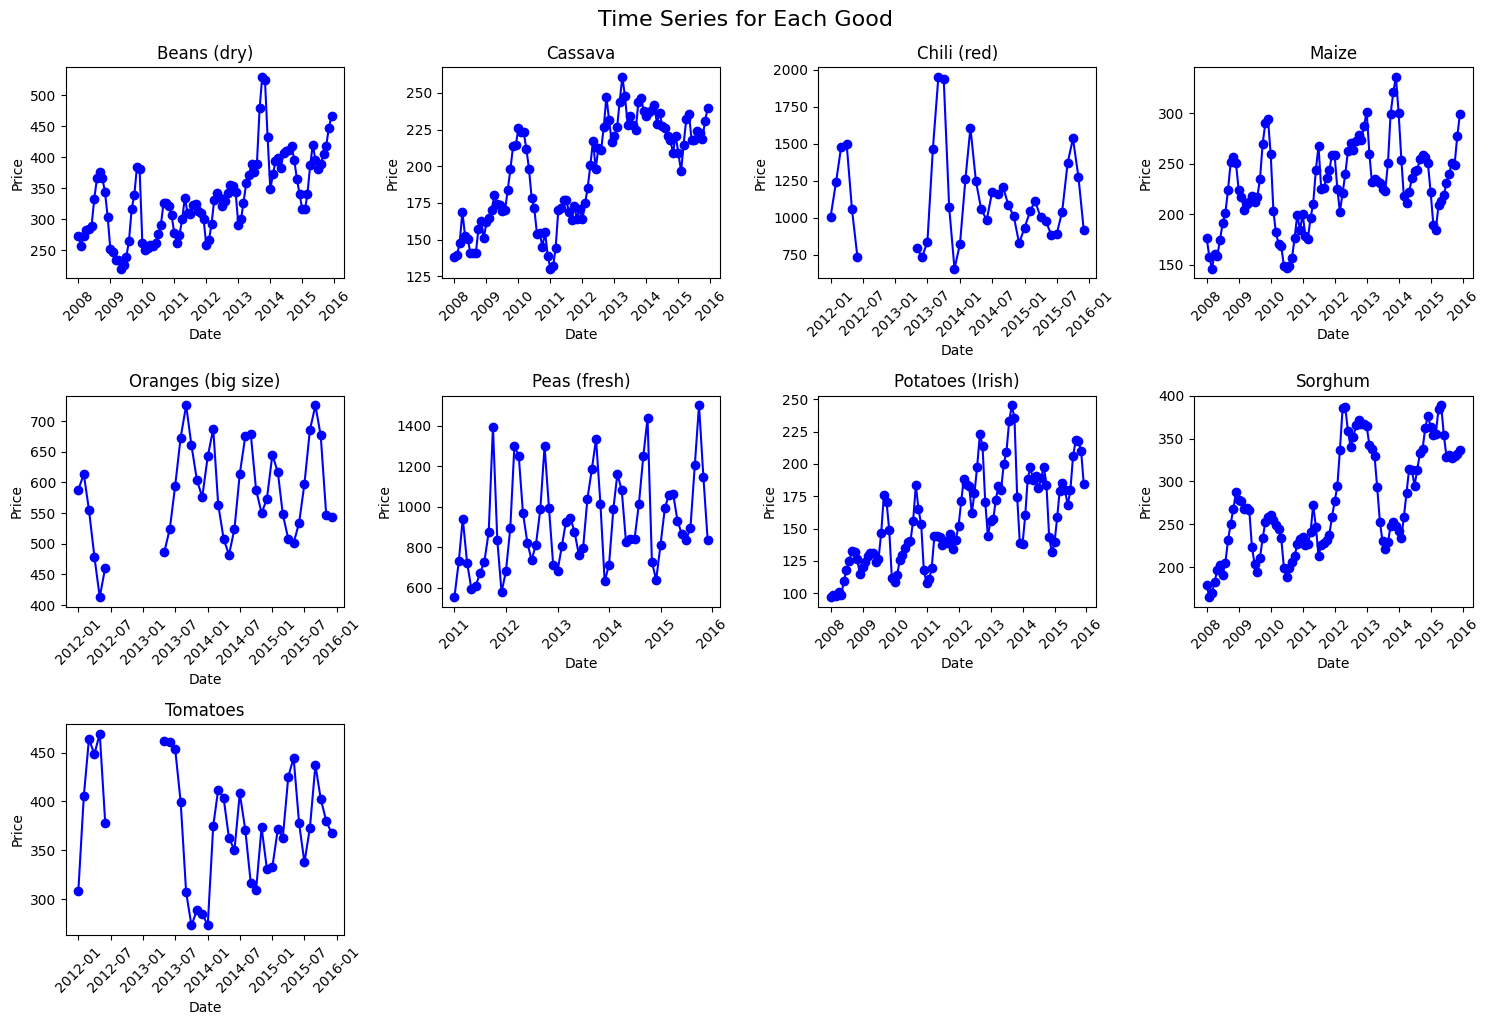

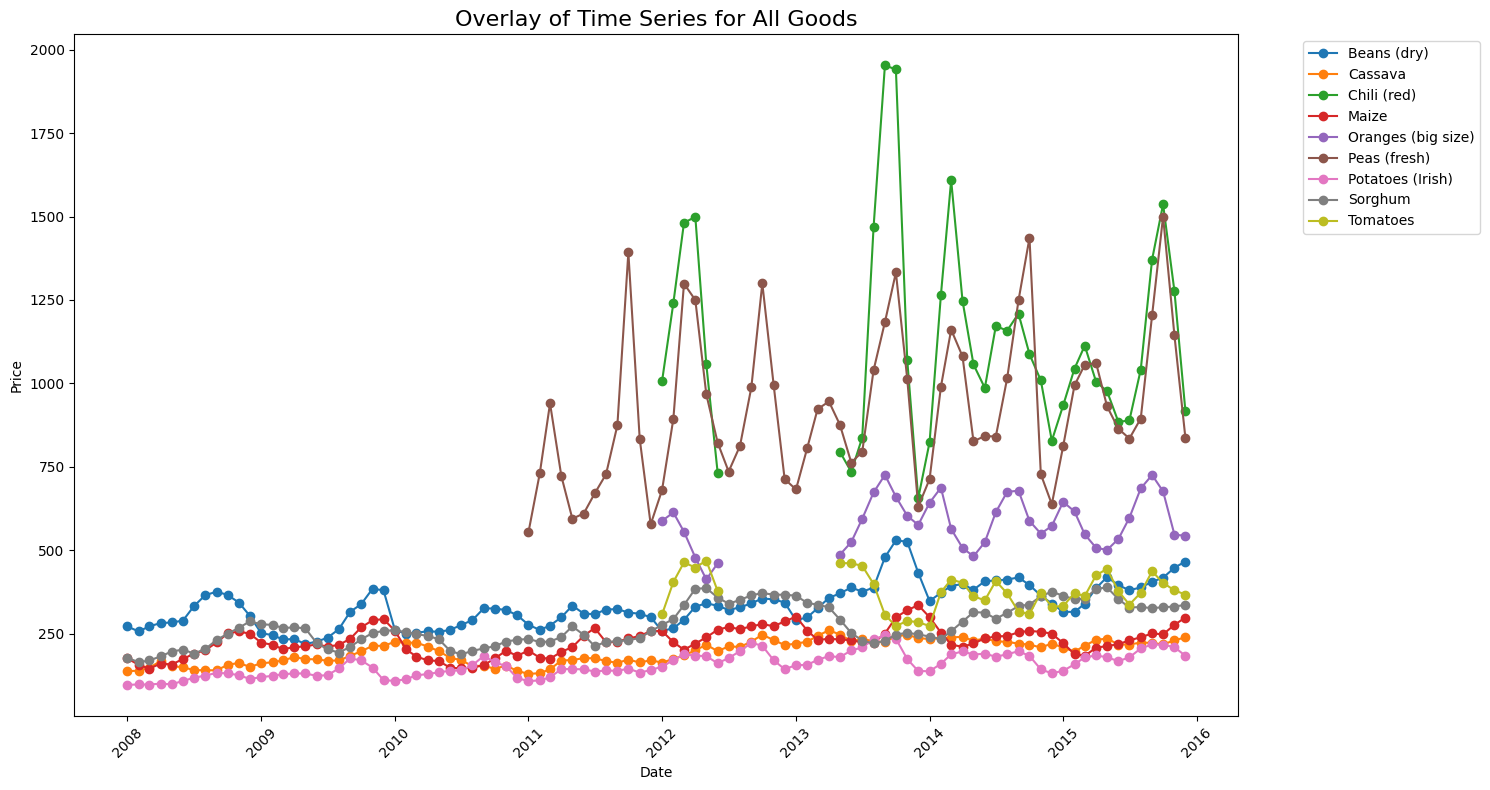

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(aligned_data.columns, start=1):
    plt.subplot(3, 4, i)
    plt.plot(aligned_data.index, aligned_data[column], label=column, color='blue', linestyle='-', marker='o')
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.suptitle('Time Series for Each Good', fontsize=16, y=1.02)
plt.show()

plt.figure(figsize=(15, 8))
for column in aligned_data.columns:
    plt.plot(aligned_data.index, aligned_data[column], label=column, linestyle='-', marker='o')

plt.title('Overlay of Time Series for All Goods', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Task 3: Handle Missing Values

 Objective: Ensure the data is complete and consistent for analysis by handling missing values appropriately.

In [28]:
missing_values = aligned_data.isnull().sum()
total_missing = missing_values.sum()
print("Total Missing Values in the DataFrame:", total_missing)
print("\nMissing Values Per Column:")
print(missing_values)
columns_with_missing = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(columns_with_missing)


Total Missing Values in the DataFrame: 210

Missing Values Per Column:
Beans (dry)            0
Cassava                0
Chili (red)           58
Maize                  0
Oranges (big size)    58
Peas (fresh)          36
Potatoes (Irish)       0
Sorghum                0
Tomatoes              58
dtype: int64

Columns with Missing Values:
Chili (red)           58
Oranges (big size)    58
Peas (fresh)          36
Tomatoes              58
dtype: int64


In [29]:
ffill_data = aligned_data.ffill()
aligned_data = aligned_data.bfill()
interpolated_data = aligned_data.interpolate(method='linear')

In [30]:
aligned_data.isnull().sum()

,0
Beans (dry),0
Cassava,0
Chili (red),0
Maize,0
Oranges (big size),0
Peas (fresh),0
Potatoes (Irish),0
Sorghum,0
Tomatoes,0


Explanation and Justification for Missing Data Handling:
Identify Missing Data:

This function just displays on the script the total number of rows which have missing entries for each column. This enables one to determine the level of missing data before selecting a method to use in an attempt to manage it.
Method Applied: Linear Interpolation

Linear interpolation more as it draws the curve through two points at a time so it is used to estimate a missing value in accordance with the values before and after it. This is appropriate for extractive continuous production data where the trends or patterns are most likely to be linear over short time periods.
Alternative Methods:

Forward-fill (ffill): If no valid observations are made in a specific interval, then, extrapolates and assigns the previous good observation to the interval. Useful when the most current rate values are the most appropriate to represent the missing periods.
Backward-fill (bfill): Imputes missing values by replacing the missing value by the next correct or valid value. Proper when future values are relatively accurate.

Task 4: Analyze Similarities Between Products
nalyze Similarities Between Products
Objective: Identify which two goods have the most similar production patterns over time

In [31]:
correlation_matrix = aligned_data.corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Beans (dry),Cassava,Chili (red),Maize,Oranges (big size),Peas (fresh),Potatoes (Irish),Sorghum,Tomatoes
Beans (dry),1.000000,0.608960,0.334063,0.557645,0.094321,0.583496,0.684833,0.333250,0.243318
Cassava,0.608960,1.000000,0.064851,0.567534,-0.197741,0.552224,0.669918,0.609231,0.569327
Chili (red),0.334063,0.064851,1.000000,-0.048699,0.509725,0.491943,0.393228,-0.102014,-0.098767
Maize,0.557645,0.567534,-0.048699,1.000000,-0.097217,0.320217,0.382097,0.458661,0.242268
Oranges (big size),0.094321,-0.197741,0.509725,-0.097217,1.000000,0.013765,-0.030264,-0.456296,-0.553691
Peas (fresh),0.583496,0.552224,0.491943,0.320217,0.013765,1.000000,0.737929,0.529379,0.488511
Potatoes (Irish),0.684833,0.669918,0.393228,0.382097,-0.030264,0.737929,1.000000,0.494535,0.578590
Sorghum,0.333250,0.609231,-0.102014,0.458661,-0.456296,0.529379,0.494535,1.000000,0.690768
Tomatoes,0.243318,0.569327,-0.098767,0.242268,-0.553691,0.488511,0.578590,0.690768,1.000000


In [32]:
import numpy as np
correlation_matrix = aligned_data.corr()
correlation_matrix = correlation_matrix.mask(np.equal(*np.indices(correlation_matrix.shape)))
max_correlation = np.nanmax(correlation_matrix)
row_max, col_max = correlation_matrix[correlation_matrix == max_correlation].stack().idxmax()
print(f"The pair of goods with the highest correlation is: {row_max} and {col_max}")
print(f"Correlation value: {max_correlation}")

The pair of goods with the highest correlation is: Peas (fresh) and Potatoes (Irish)
Correlation value: 0.7379291373242894


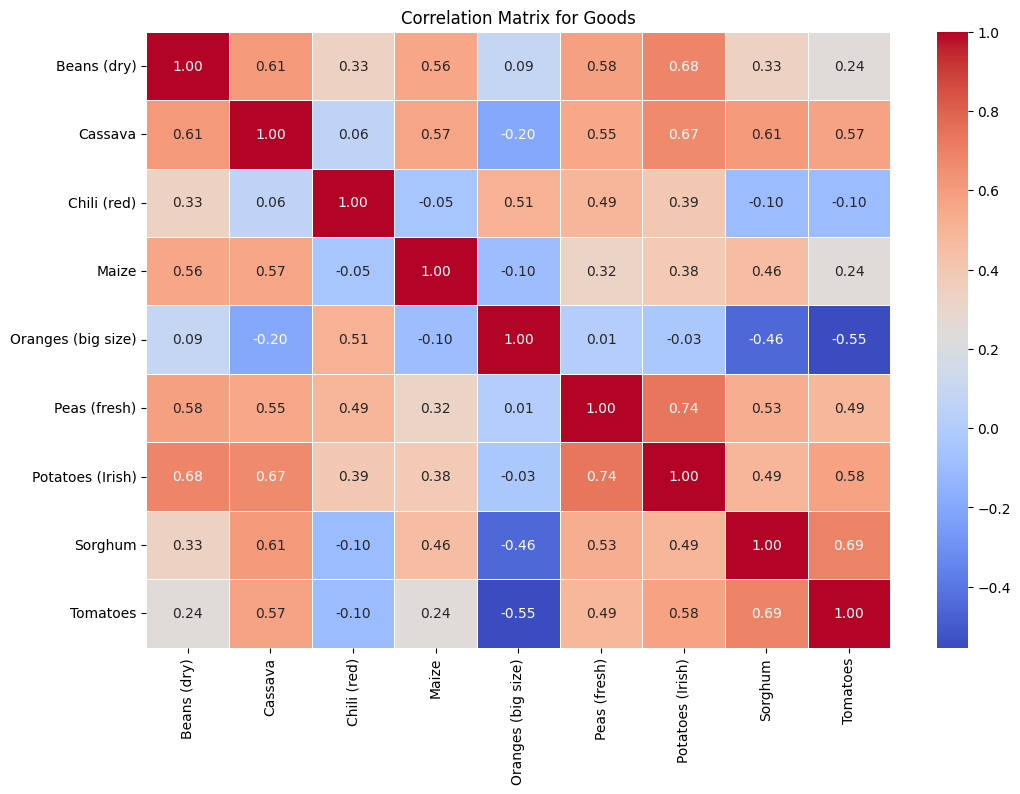

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = aligned_data
correlation_matrix = combined_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Goods')
plt.show()

Correlation measures the degree of the straight line relationship between two variables. For production patterns it measures the extent of co-movement of each good with the other.
Justification:
High correlation means the movements are in the same general direction, whether it’s an increase or a decrease in certain type of product.
It is used to define complementary or substitutive relations, which are important when regarding the dependency and strategic management.

Task 5: Forecasting for the Next 6 Months
Objective: Use different forecasting methods to predict production values for the next 6 months for a selected good.

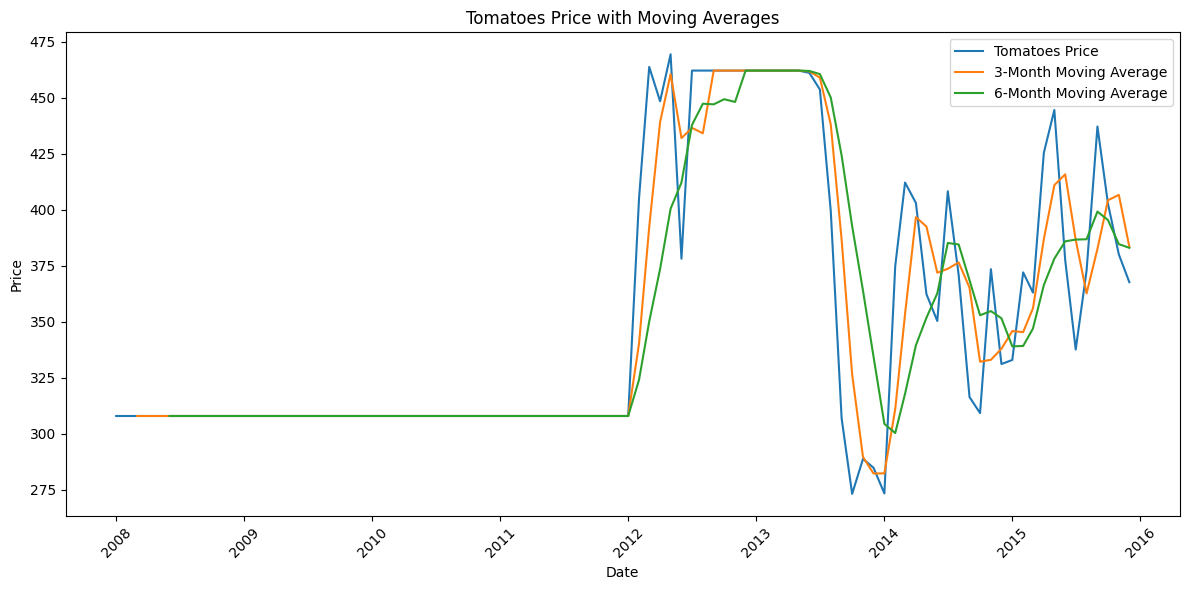

In [34]:

tomatoes_data = aligned_data['Tomatoes']

window_sizes = [3, 6]
moving_averages = {}

for window in window_sizes:
    moving_averages[window] = tomatoes_data.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(tomatoes_data.index, tomatoes_data, label='Tomatoes Price')

for window, ma in moving_averages.items():
    plt.plot(tomatoes_data.index, ma, label=f'{window}-Month Moving Average')

plt.title('Tomatoes Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
print(tomatoes_data.isna().sum())

0


In [36]:
print(tomatoes_data.index)


DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
      

In [37]:
tomatoes_data.index = pd.to_datetime(tomatoes_data.index)


In [38]:
window_sizes = [3, 6]
moving_averages = {}

for window in window_sizes:
    moving_averages[window] = tomatoes_data.rolling(window=window).mean()


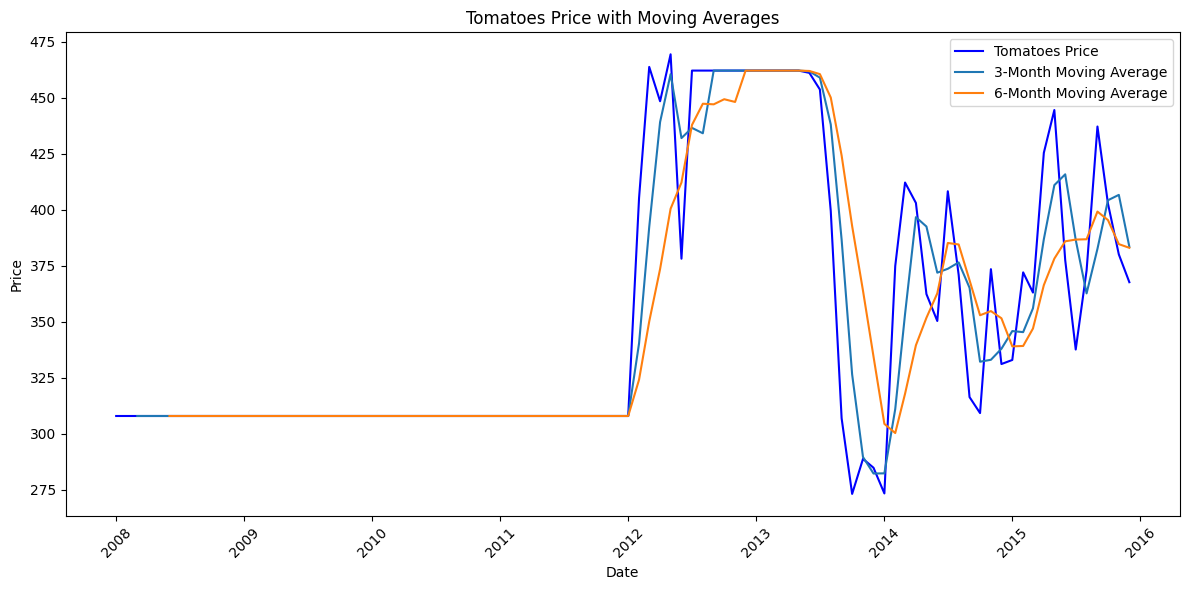

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(tomatoes_data.index, tomatoes_data, label='Tomatoes Price', color='blue')

for window, ma in moving_averages.items():
    plt.plot(tomatoes_data.index, ma, label=f'{window}-Month Moving Average')

plt.title('Tomatoes Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
print(moving_averages[3].head())
print(moving_averages[6].head())

date
2008-01-01           NaN
2008-02-01           NaN
2008-03-01    307.993524
2008-04-01    307.993524
2008-05-01    307.993524
Name: Tomatoes, dtype: float64
date
2008-01-01   NaN
2008-02-01   NaN
2008-03-01   NaN
2008-04-01   NaN
2008-05-01   NaN
Name: Tomatoes, dtype: float64


<ipython-input-41-c317d37f421c>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tomatoes_data = tomatoes_data.fillna(method='ffill')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


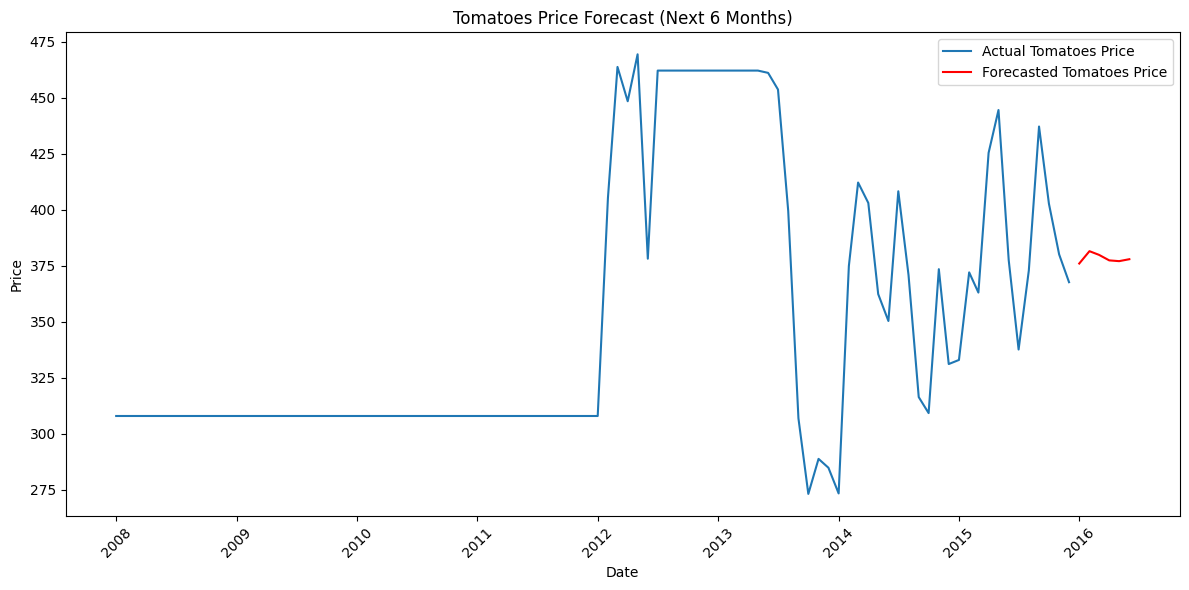

,Tomatoes
2016-01-01,376.073091
2016-02-01,381.584679
2016-03-01,379.941471
2016-04-01,377.476626
2016-05-01,377.134995
2016-06-01,378.003542


In [41]:

from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

tomatoes_data = aligned_data['Tomatoes']

tomatoes_data = tomatoes_data.fillna(method='ffill')

model = ARIMA(tomatoes_data, order=(5,1,0))
model_fit = model.fit()

forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)


last_date = tomatoes_data.index.max()
forecast_index = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_steps, freq='MS')


forecast_df = pd.DataFrame({'Tomatoes': forecast}, index=forecast_index)


plt.figure(figsize=(12, 6))
plt.plot(tomatoes_data.index, tomatoes_data, label='Actual Tomatoes Price')
plt.plot(forecast_df.index, forecast_df['Tomatoes'], label='Forecasted Tomatoes Price', color='red')

plt.title('Tomatoes Price Forecast (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

forecast_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


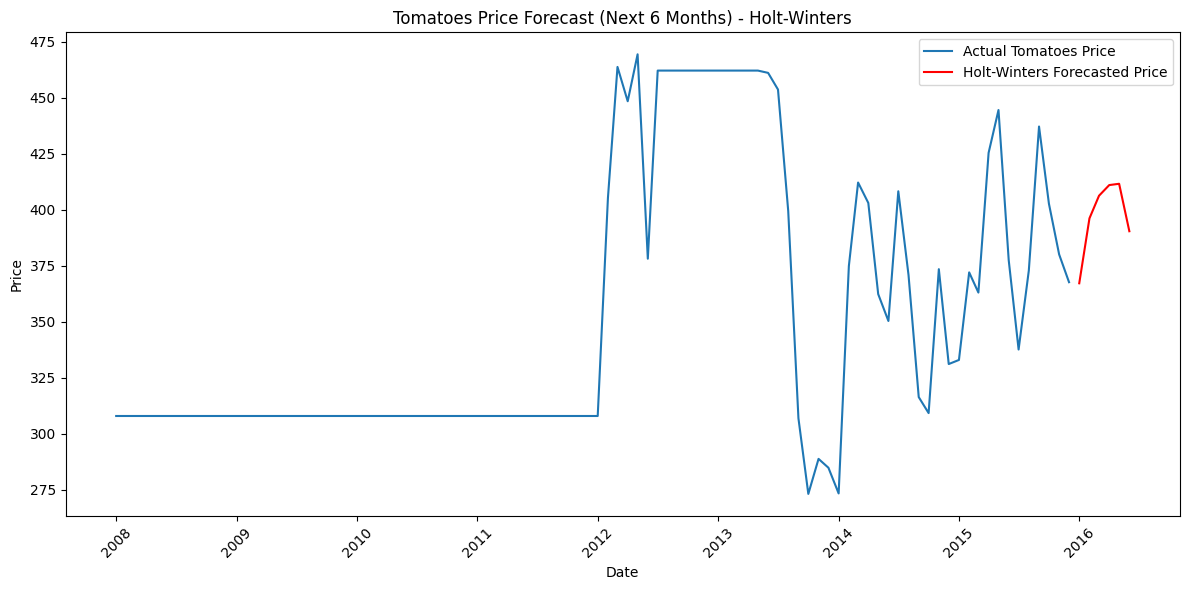

,Tomatoes
2016-01-01,367.251288
2016-02-01,396.256600
2016-03-01,406.348679
2016-04-01,411.102480
2016-05-01,411.681062
2016-06-01,390.493630


In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
tomatoes_data = aligned_data['Tomatoes']
model = ExponentialSmoothing(tomatoes_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
last_date = tomatoes_data.index.max()
forecast_index = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_steps, freq='MS')
forecast_df = pd.DataFrame({'Tomatoes': forecast}, index=forecast_index)
plt.figure(figsize=(12, 6))
plt.plot(tomatoes_data.index, tomatoes_data, label='Actual Tomatoes Price')
plt.plot(forecast_df.index, forecast_df['Tomatoes'], label='Holt-Winters Forecasted Price', color='red')

plt.title('Tomatoes Price Forecast (Next 6 Months) - Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

forecast_df

<ipython-input-43-07e75d8dc623>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tomatoes_data = tomatoes_data.fillna(method='ffill')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbm9dn2ss/f8wq1m2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbm9dn2ss/10cdsnvs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13879', 'data', 'file=/tmp/tmpbm9dn2ss/f8wq1m2d.json', 'init=/tmp/tmpbm9dn2ss/10cdsnvs.json', 'output', 'file=/tmp/tmpbm9dn2ss/prophet_model3zwiv74a/prophet_model-20241129000422.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:04:22 - c

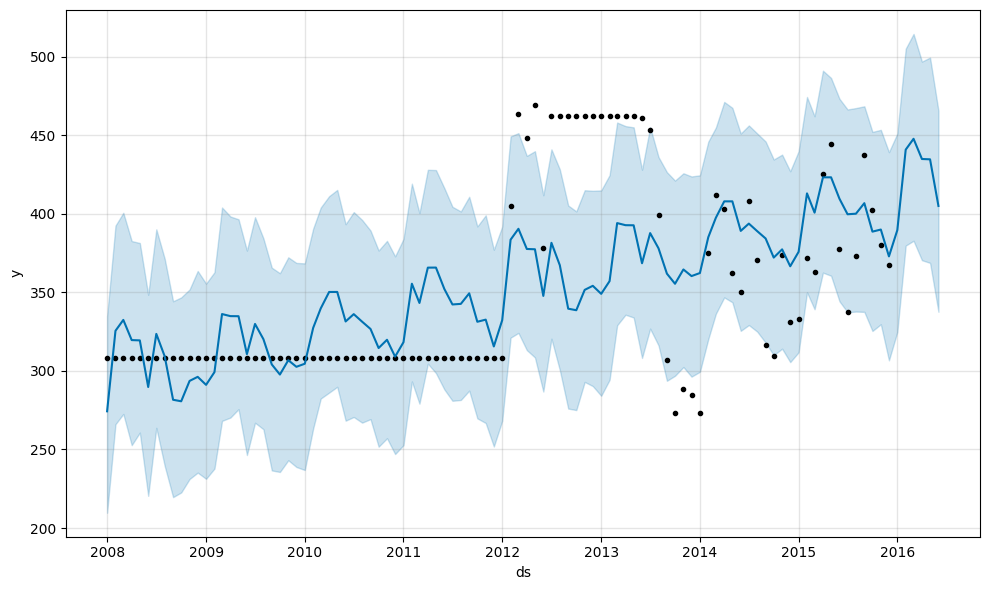

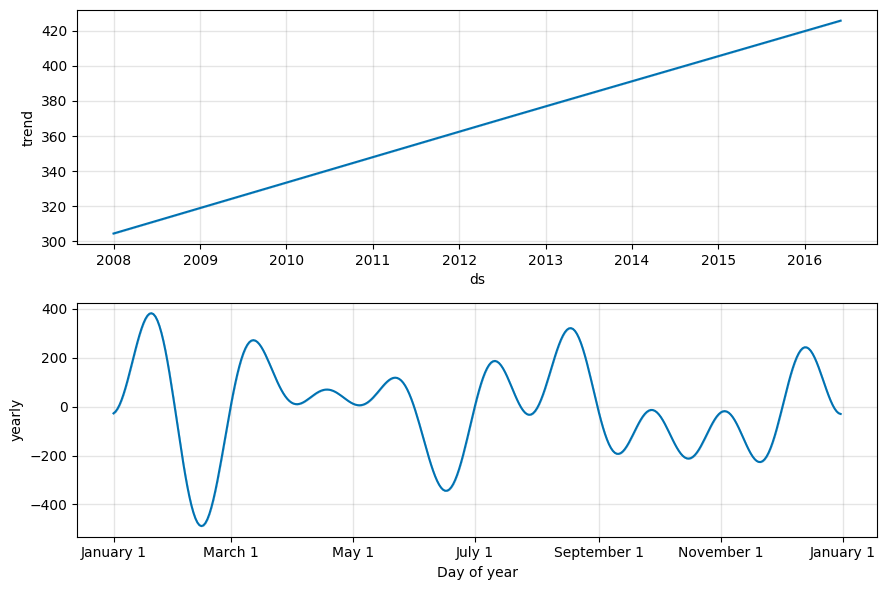

In [43]:
from prophet import Prophet
tomatoes_data = aligned_data['Tomatoes']
tomatoes_data = tomatoes_data.fillna(method='ffill')
prophet_data = pd.DataFrame({'ds': tomatoes_data.index, 'y': tomatoes_data.values})
model = Prophet()
model.fit(prophet_data)
future = model.make_future_dataframe(periods=6, freq='MS')
forecast = model.predict(future)
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
plt.show()